# Load dataset

In [28]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data_path = "test_sine.pkl"
with open(data_path, 'rb') as f:
    data = pickle.load(f)

# Auxiliary Functions

In [29]:
from torch.autograd import Variable
def to_variable(X, cuda=True):
    if isinstance(X, (tuple, list)):
        return tuple(to_variable(x) for x in X)
    else:
        X = Variable(X)
        if cuda:
            return X.cuda().requires_grad_()
        return X.requires_grad_()

# Load model

In [30]:
import simple # Replace with the actual name of your model class

# Load the model
model_props = {"a": 2, "b": 32}
simple.configure(model_props)  # Replace with the actual name of your model class
model = simple.model

In [31]:
# Load the state dict
state_dict_path = "s3.pth"
checkpoint = torch.load(state_dict_path)

# Load the model's state dict
model.load_state_dict(checkpoint)
model.eval()

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=2, bias=True)
)

# Run Predictions

In [50]:
st = data.iloc[1:2]
st['Xt'] = 1.0
st['Xt-1'] = 1.0
start = to_variable(torch.tensor(np.array(st)), cuda=False)
path = []
INDEX = 0
for i in range(1, 1000):
    k1 = model(start)
    k1.detach()
    start = k1
    start.detach()
    print(start[0][INDEX].item())
    path.append(start[0][INDEX].item())

-0.00019816216953902344
-0.0018685381032211013
-0.004859190295081112
-0.00890605071016079
-0.013656210500371607
-0.01869867586017157
-0.023599911334500706
-0.027941098172103718
-0.03135390705892313
-0.03355173114436735
-0.0343537324737391
-0.03369968631870021
-0.031654408035162535
-0.02840144644049475
-0.024226648680042706
-0.019493065156136608
-0.014609395721298851
-0.009994718051834522
-0.00604254087226716
-0.0030872640972794685
-0.0013759032103727586
-0.0010474671502002375
-0.0021217091760328544
-0.004498157206369396
-0.00796544444786304
-0.012220079032501246
-0.016892988368368916
-0.021581518263518867
-0.02588411385198
-0.029434696500737878
-0.031933794978586644
-0.033173784890719954
-0.03305611088240676
-0.03159906546242544
-0.02893551552736856
-0.025300832091837117
-0.02101211604408873
-0.0164405514200148
-0.01197929506768422
-0.008009679197536507
-0.00486863097098042
-0.0028200914940949284
-0.002032857291026008
-0.0025667027356716388
-0.004367921606968833
-0.007274612522533058
-

/tmp/ipykernel_24262/318393202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Xt'] = 0.0
/tmp/ipykernel_24262/318393202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Xt-1'] = 0.0


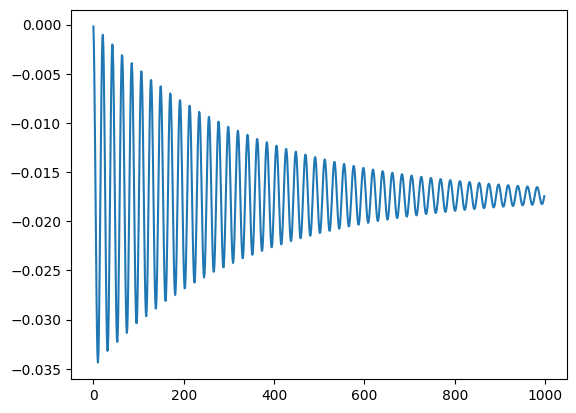

In [52]:
plt.plot(path[0:1000])

In [ ]:
y1 = path[:2000]
y2 = pit300

plt.figure(figsize=(12, 4))

# Plotting the first set of points
plt.subplot(1, 2, 1)
plt.plot(y1, label='Model predictions')
plt.title('Model Predictions (Skip 10, stable)')

# Plotting the second set of points
plt.subplot(1, 2, 2)
plt.plot(y2[:20000], label='PIT300')
plt.title('PIT300 - Training Set')

# # Plotting both lines in the same plot
# plt.subplot(1, 2, 1)
# plt.plot(y1, label='Line 1')
# plt.plot(y2, label='Line 2')
# plt.legend()
# plt.title('Both Lines')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


NameError: name 'pit300' is not defined